In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

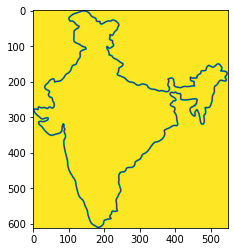

In [12]:
input_image = "sample.jpg"
# input_image = "sample2.jpg"
# input_image = "sample3.jpg"
# input_image = "sample4.jpg"
# input_image = "sample5.jpg" # min_threshold =  min_threshold-6
# input_image = "arrow.jpg"
src = cv2.imread(input_image, 1) # read input image
# find max and min of the image
max_threshold = np.max(src)
# second max value
min_threshold = np.max(src[src < max_threshold])

# if image 5
# min_threshold = min_threshold-6
src = cv2.imread(input_image, 1) # read input image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
ret, thresh = cv2.threshold(gray, min_threshold, max_threshold, cv2.THRESH_BINARY)
# for arrow.jpg
ret, thresh = cv2.threshold(gray, 110, 225, cv2.THRESH_BINARY)
plt.imshow(gray)
# plt.imshow(thresh)


Counture found :  2
Largest contour index :  1


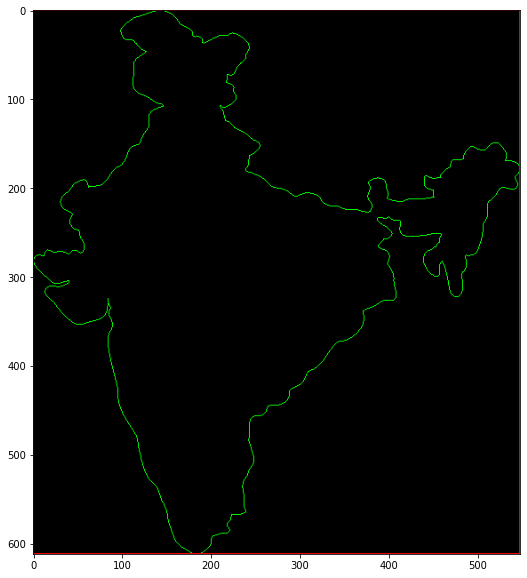

In [13]:
# Finding contours for the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# create hull array for convex hull points
hull = []
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (0, 255, 0) # green - color for contours
color = (255, 0, 0) # blue - color for convex hull BGR

print("Counture found : ", len(contours))

# find the largest contour
outer_contour_index = None
outer_contour_area = 0
for i in range(len(contours)):
    if len(contours[i]) > 4 and (cv2.contourArea(contours[i]) > outer_contour_area):
        outer_contour_area = cv2.contourArea(contours[i])
        outer_contour_index = i
print("Largest contour index : ", outer_contour_index)

if(outer_contour_index is None):
    print("No contour found")
    print(contours)
    # pause the program
    # plt.show()
else:
    outer_contour = contours[outer_contour_index]
    # mark points via cv2
    # for i in range(len(outer_contour)):
    #     # make drawing[outer_contour[i][1]][outer_contour[i][0]] = color with a width of 3
    #     cv2.circle(drawing, (outer_contour[i][0][0], outer_contour[i][0][1]), 1, color, -1)

    # mark points manually
    # for c_index in range(len(contours[outer_contour_index])):
    #     drawing[contours[outer_contour_index][c_index][0][1], contours[outer_contour_index][c_index][0][0]] = color

    # draw contours via cv2
    cv2.drawContours(drawing, contours, outer_contour_index, color_contours, 1, 8, hierarchy)
    # draw convex hull via cv2
    cv2.drawContours(drawing, hull, outer_contour_index, color, 1, 8)

    # get convex hull points
    hull_points = np.asarray(hull[outer_contour_index])
    hull_points = outer_contour
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(drawing)
    hull_points = outer_contour

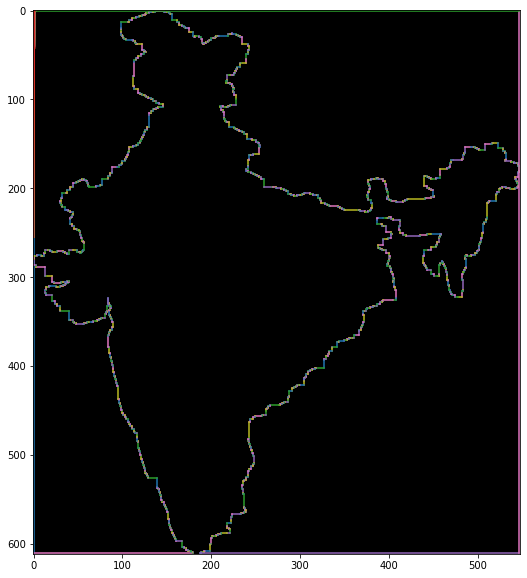

In [14]:
# draw original convex hull
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color = (255, 0, 0) # blue - color for convex hull BGR

fig = plt.figure(figsize=(10, 10))
# connecting points with lines perpendicular to the line joining the two points
for i in range(len(hull_points)):
    # get the point perpendicular to the line joining the two points
    # print("from : ", hull_points[i], "To : ", hull_points[(i+1)%len(hull_points)])
    first_point = hull_points[i][0]
    last_point = hull_points[(i+1)%len(hull_points)][0]
    perp_point = (first_point[0], last_point[1])
    # draw the lines from first point to the perpendicular point and from the perpendicular point to the last point using matplotlib
    plt.plot([first_point[0], perp_point[0]], [first_point[1], perp_point[1]], color)
    plt.plot([perp_point[0], last_point[0]], [perp_point[1], last_point[1]], color)

#     cv2.line(drawing, (first_point[0], first_point[1]), (perp_point[0], perp_point[1]), color, 1)
#     cv2.line(drawing, (perp_point[0], perp_point[1]), (last_point[0], last_point[1]), color, 1)

# cv2.imshow("drawing", drawing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# show image
plt.imshow(drawing)

    

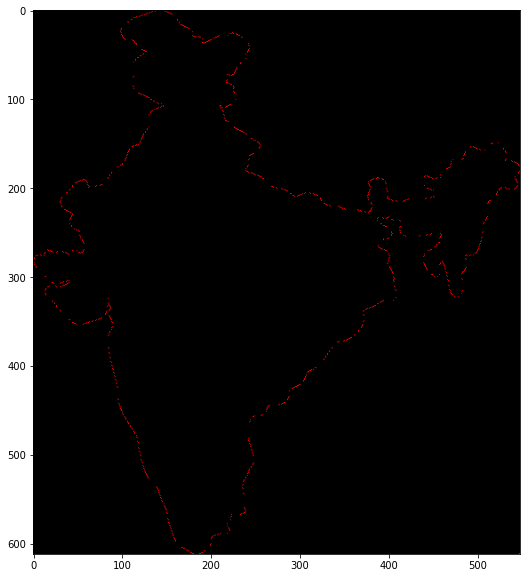

In [15]:
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (0, 255, 0) # green - color for contours
color = (255, 0, 0) # blue - color for convex hull BGR

for c_index in range(len(contours[outer_contour_index])):
    drawing[contours[outer_contour_index][c_index][0][1], contours[outer_contour_index][c_index][0][0]] = color

fig = plt.figure(figsize=(10, 10))
plt.imshow(drawing)

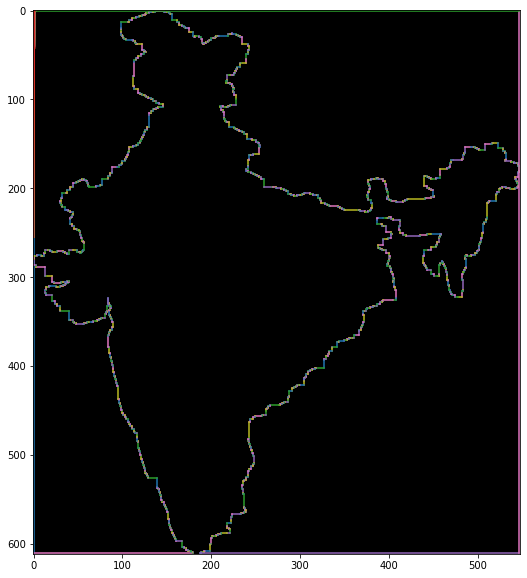

In [16]:
# draw original convex hull
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color = (255, 0, 0) # blue - color for convex hull BGR

fig = plt.figure(figsize=(10, 10))
hull_points = outer_contour
# connecting points with lines perpendicular to the line joining the two points
for i in range(len(hull_points)):
    # get the point perpendicular to the line joining the two points
    # print("from : ", hull_points[i], "To : ", hull_points[(i+1)%len(hull_points)])
    first_point = hull_points[i][0]
    last_point = hull_points[(i+1)%len(hull_points)][0]
    perp_point = (first_point[0], last_point[1])
    # draw the lines from first point to the perpendicular point and from the perpendicular point to the last point using matplotlib
    plt.plot([first_point[0], perp_point[0]], [first_point[1], perp_point[1]], color)
    plt.plot([perp_point[0], last_point[0]], [perp_point[1], last_point[1]], color)

plt.imshow(drawing)

    